Student Information
Name:朱育欣

Student ID:111062653

GitHub ID:


---


Instructions
First: do the take home exercises in the DM2022-Lab1-Master. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade.
Second: follow the same process from the DM2022-Lab1-Master on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.
Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.
Third: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.
Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.
Fifth: It's hard for us to follow if your code is messy, so please tidy up your notebook and add minimal comments where needed. This part is worth 10% of your grade.
You can submit your homework following these guidelines: Git Intro & How to hand your homework. Make sure to commit and save your changes to your repository BEFORE the deadline (October 20th 11:59 pm, Thursday).

---

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# Part1: take home

In [103]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import nltk

import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Data Preparation

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
len(twenty_train.data)

2257

---

In [6]:
# construct dataframe from a list
# twenty_train is dict
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [8]:
# add category to the dataframe
X['category'] = twenty_train.target

In [9]:
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [10]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

---

### 3.2 Familiarizing yourself with the Data

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [11]:
#Answer here
# iat[資料索引值,欄位順序]：利用資料索引值及欄位順序來取得「單一值」
# loc[資料索引值,欄位名稱]：利用資料索引值及欄位名稱來取得「資料集」
# iloc[資料索引值,欄位順序]：利用資料索引值及欄位順序來取得「資料集」

X.loc[lambda df: df['category_name'] !=  'alt.atheism', ['text', 'category_name']].head()

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian

In [12]:
X.loc[X['category'] == 1, ['text', 'category_name']].head()

text  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...  comp.graphics

In [13]:
X.iloc[10:, [0, 1, 2]].head()

text  category  \
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   

             category_name  
10  soc.religion.christian  
11           comp.graphics  
12             alt.atheism  
13             alt.atheism  
14           comp.graphics

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [14]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [15]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [16]:
len(X)

2259

In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [18]:
# drop the empty data row
X.dropna(inplace=True)
print(X.category)

0       1
1       1
2       3
3       3
4       3
       ..
2254    2
2255    2
2256    2
2257    1
2258    1
Name: category, Length: 2259, dtype: int64


In [19]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [20]:
len(X)

2259

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [21]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [22]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here
pd.DataFrame.isnull() returns a boolean same-sized object indicating if the values are NA. <br>
NA values, such as None or numpy.NaN, gets mapped to True values. <br>
Everything else gets mapped to False values.<br>
Characters such as empty strings '' or numpy.inf are not considered NA values.<br>
Strings called 'NaN' are also not considered as null values.<br>


---

### 4.2 Dealing with Duplicate Data

In [23]:
X.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

We can also check the sum of duplicate records by simply doing:

In [24]:
sum(X.duplicated())

1

In [25]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [26]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [27]:
len(X)

2261

In [28]:
sum(X.duplicated('text'))
print(X.category)

0       1
1       1
2       3
3       3
4       3
       ..
2256    2
2257    1
2258    1
2259    1
2260    1
Name: category, Length: 2261, dtype: int64


In [29]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [30]:
print(X.category)

0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 2257, dtype: int64


In [31]:
len(X)

2257

---

## 5.  Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization （離散化）
- Attribute Transformation

---

In [32]:
X_sample = X.sample(n=1000) #random state

In [33]:
X_sample[0:5]

text  category  \
646   From: ukrphil@prlhp1.prl.philips.co.uk (M.J.Ph...         1   
276   From: chrisb@tafe.sa.edu.au (Chris BELL) Subje...         0   
1189  From: sun075!Gerry.Palo@uunet.uu.net (Gerry Pa...         3   
509   From: kshin@stein.u.washington.edu (Kevin Shin...         1   
2031  From: haston@utkvx.utk.edu (Haston, Donald Way...         1   

               category_name  
646            comp.graphics  
276              alt.atheism  
1189  soc.religion.christian  
509            comp.graphics  
2031           comp.graphics

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [34]:
X[:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

### Answer here
#### what we did
1. add three columns (text, category, category_name) into X.
2. add dummy null records and drop it from X.
3. add dummy duplicated records and drop it from X.
#### difference between X and X_sample
 - X start from index 0. While X_sample start at random position.


---

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot: title={'center': 'Category distribution'}, xlabel='category_name'>

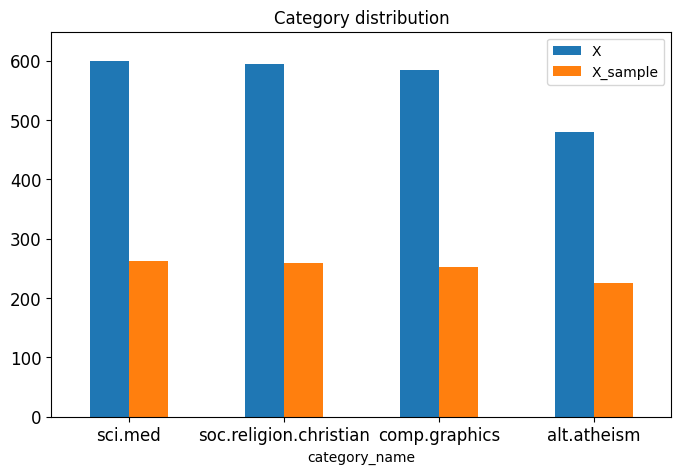

In [36]:
# Answer here

# creating dataframe
df = pd.DataFrame({
    'category_name': ['sci.med', 'soc.religion.christian', 'comp.graphics', 'alt.atheism'],
    'X': X.category_name.value_counts().values,
    'X_sample': X_sample.category_name.value_counts().values
})
  
# plotting graph
df.plot(x="category_name", y=["X", "X_sample"], kind="bar", title = 'Category distribution',
                                           ylim = [0, max(np.concatenate((X.category_name.value_counts().values, X_sample.category_name.value_counts().values), axis=None))+50], 
                                           rot = 0, fontsize = 12, figsize = (8,5))


---

In [37]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [38]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
# create a vector of the fre of the terms

X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# (0, 14887)	1 ...
#0 means the first record (or array 0)
#the random nums(14887) mean the index of a term
# (doc#, term index) term_freq = (0, 14887) 1

---

In [40]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [41]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]
#count_vect.get_feature_names_out()

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [42]:
# we convert from sparse array to normal array
X_counts[0:5, 0:10].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [43]:
count_vect.get_feature_names_out()[0]

'00'

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [44]:
# Answer here
X_counts_arr = X_counts[4, 0:100].toarray()
for index in np.where(X_counts_arr == 1)[1]:
    print(count_vect.get_feature_names_out()[index])

00
01


---

In [45]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [46]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [47]:
plot_z = X_counts[0:20, 0:20].toarray()

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

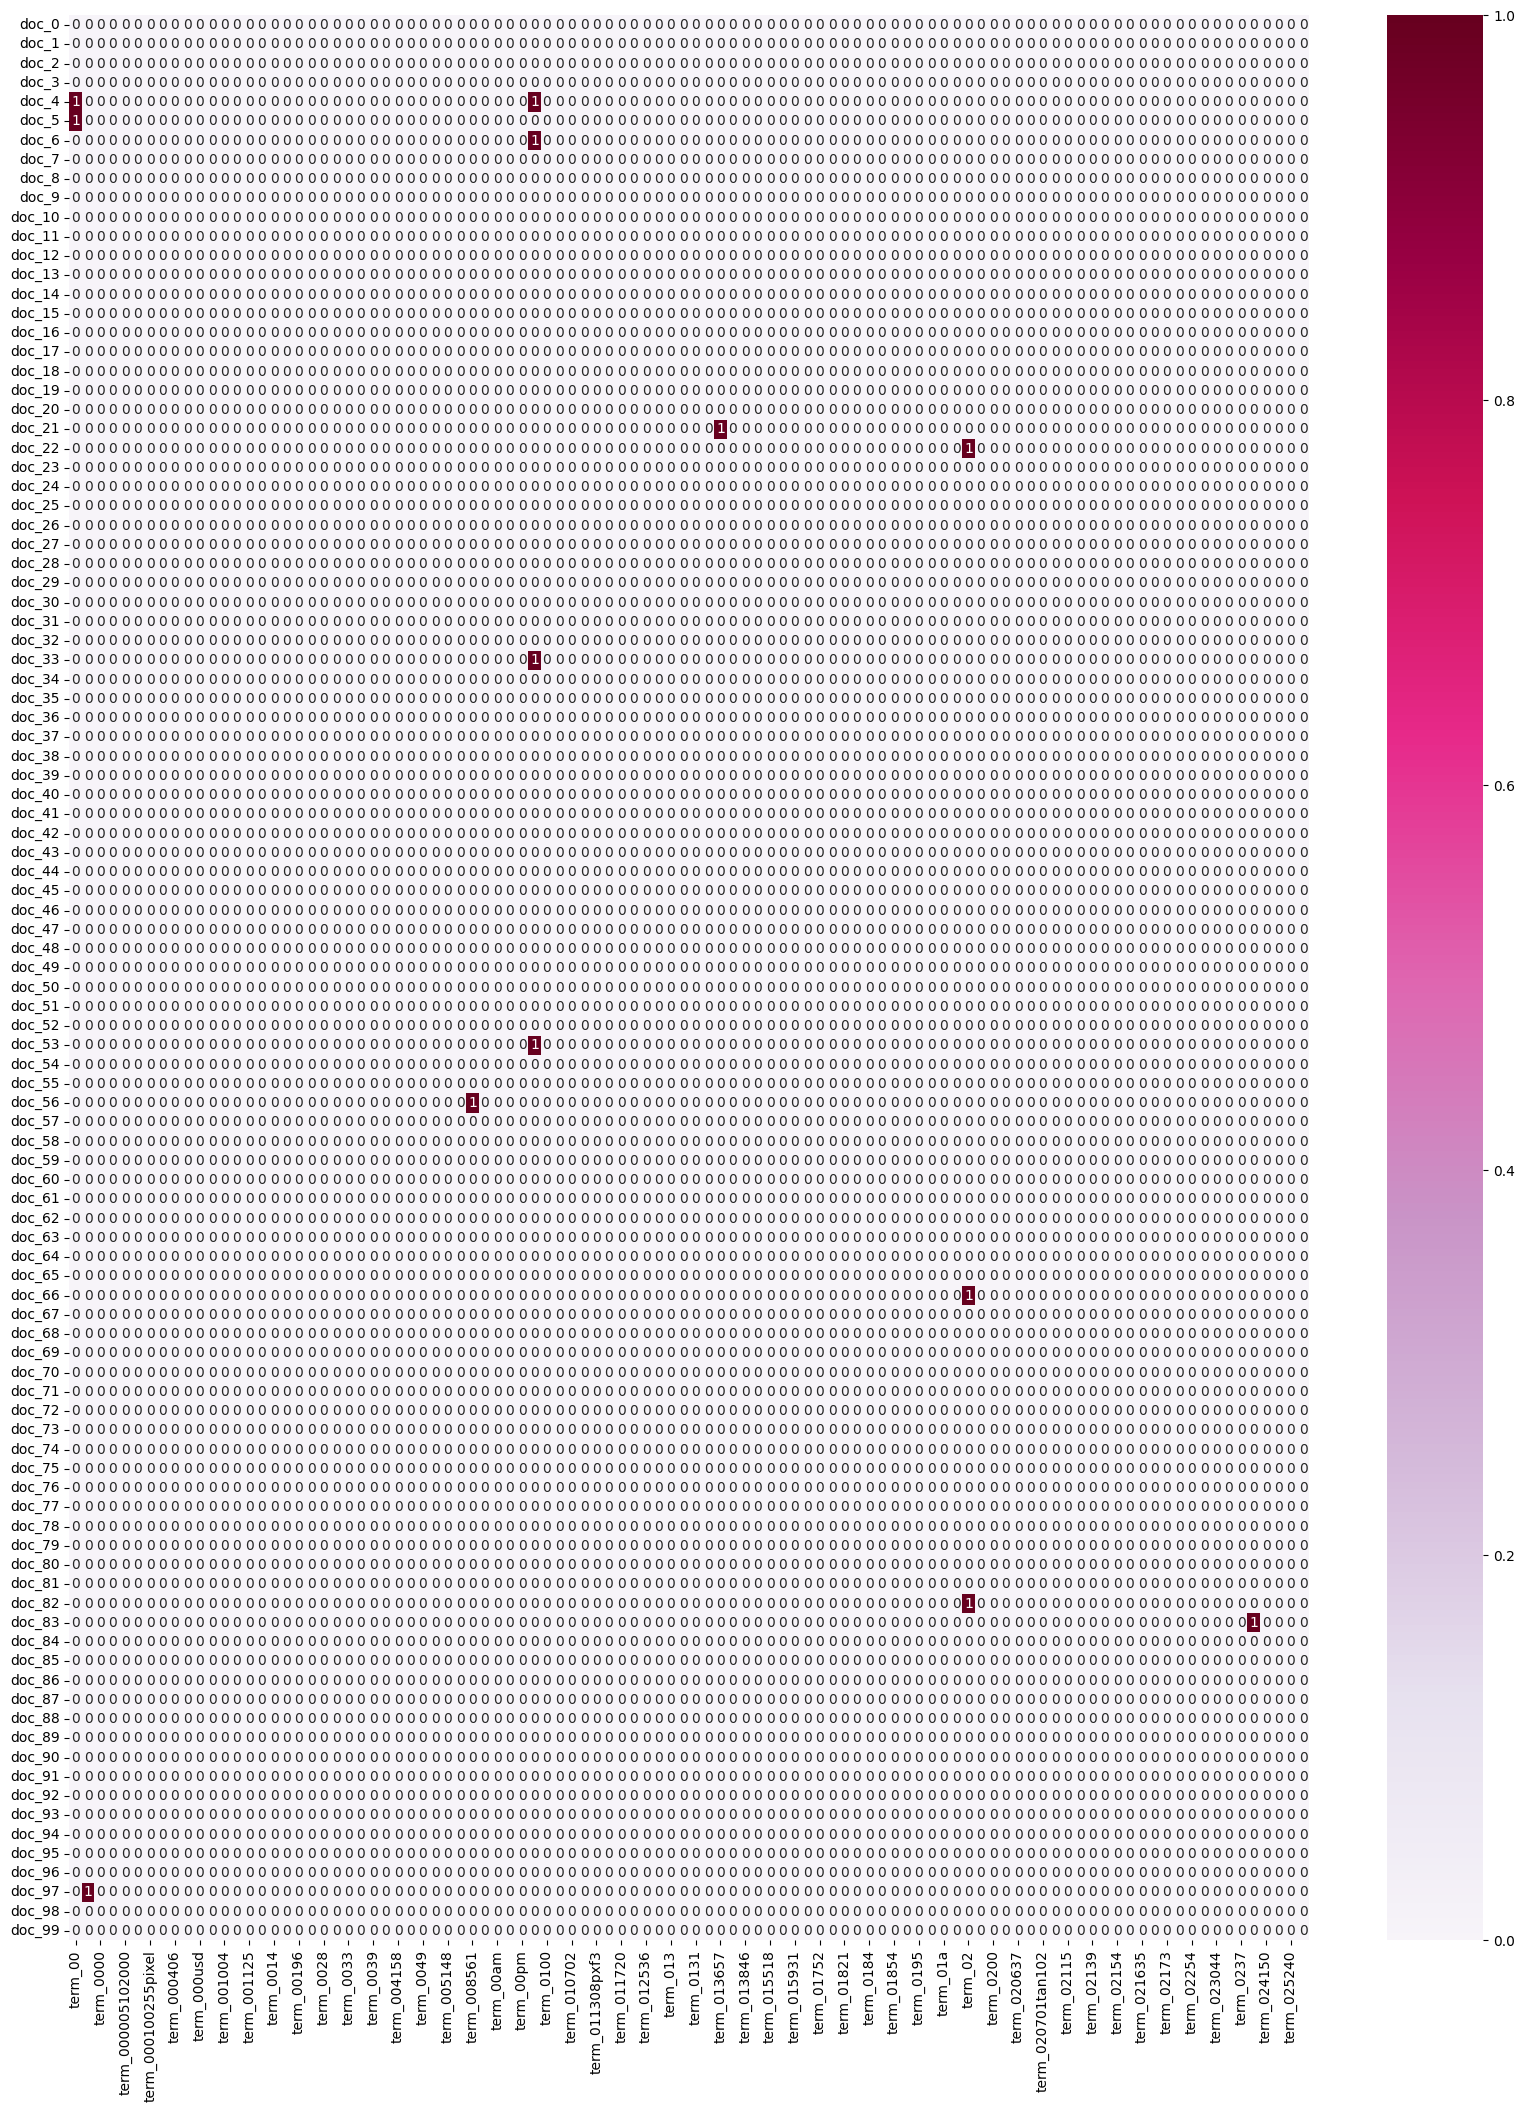

In [48]:
N = 100
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:N]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:N]]
plot_z = X_counts[:N, :N].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x[:], index = plot_y)
plt.subplots(figsize=(20, 25))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

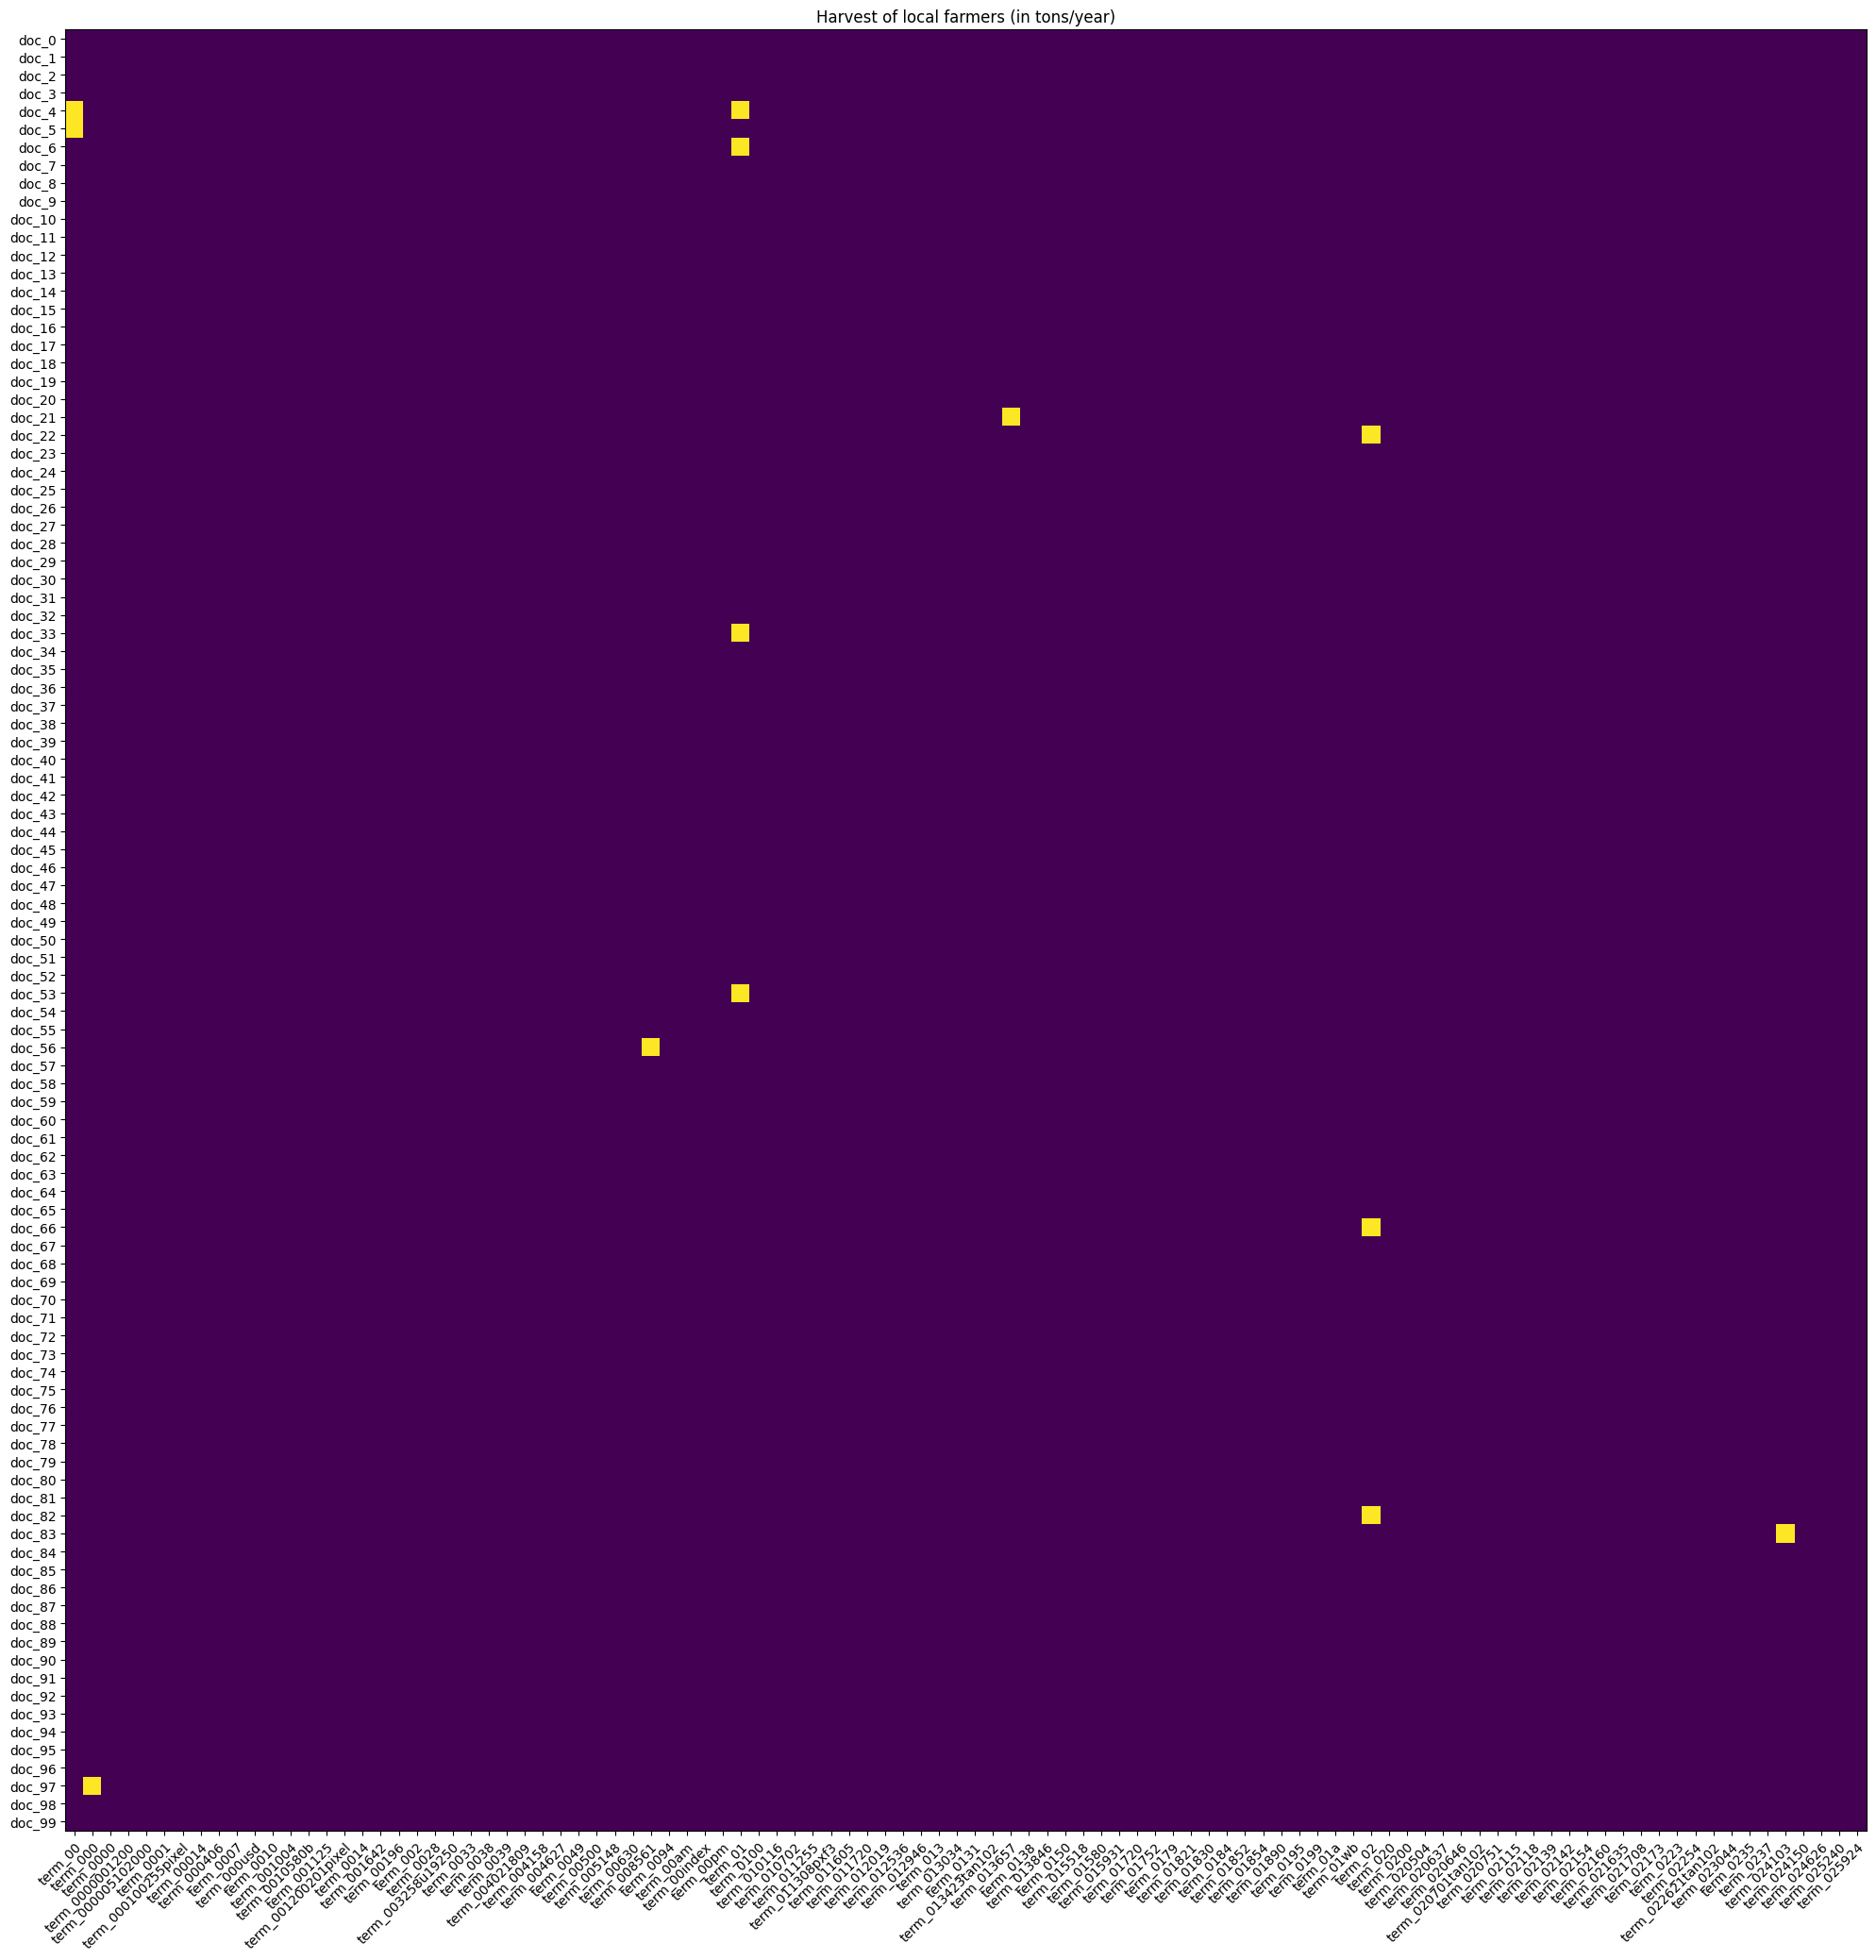

In [49]:
N = 100
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:N]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:N]]
plot_z = X_counts[:N, :N].toarray()

#df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)


fig, ax = plt.subplots(figsize=(20, 25))
im = ax.imshow(plot_z)

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(plot_y)), labels=plot_y)
ax.set_xticks(np.arange(len(plot_x)), labels=plot_x)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

589


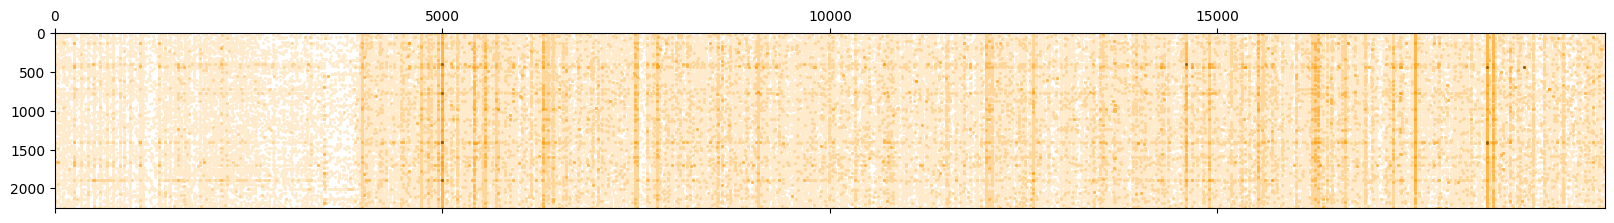

In [50]:
# heatmap-like visualization using matplotlib spy
precisions = [0, 2, 10, 50, 150, 300]
print(X_counts.max())
# color palette reference: cmap='PuRd'
colors = ['#ffebcc', '#ffd699', '#ffb84d', '#ffa31a', '#995c00', '#663d00', '#331f00']
plt.subplots(figsize=(20, 25))

# plot first 15000 terms
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, :20000], precision=p, markersize=1, color=c)

plt.show()

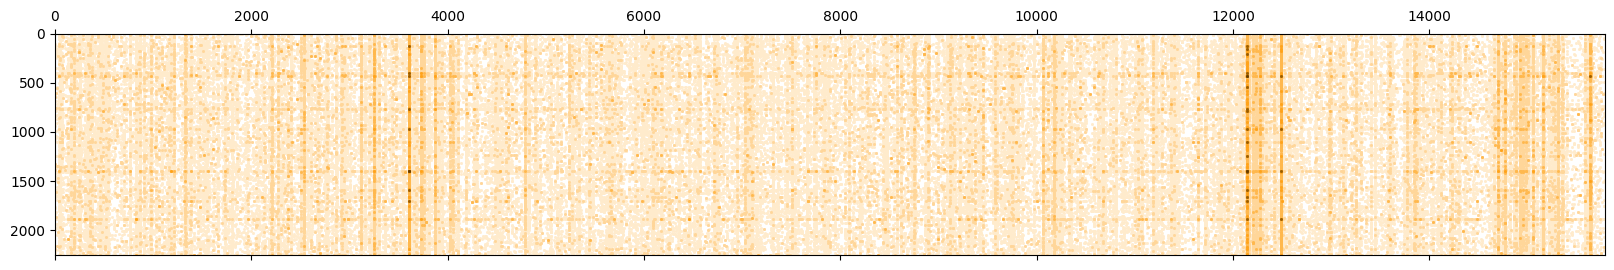

In [51]:
# plot the rest of the terms
plt.subplots(figsize=(20, 25))
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, 20000:], precision=p, markersize=1, color=c)

plt.show()


---

In [52]:
from sklearn.decomposition import PCA

In [53]:
# fit_transform(X)
# 用X来训练PCA模型，同时返回降维后的数据。
# newX=pca.fit_transform(X)，newX就是降维后的数据。
# PCA算法中所要保留的主成分个数n_components，也即保留下来的特征个数n_components, dim = 2
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [54]:
X_reduced.shape

(2257, 2)

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [55]:
X_reduced_1 = PCA(n_components = 3).fit_transform(X_counts.toarray())

import numpy as np
import matplotlib.pyplot as plt

####
def plot3D(data, elev, azim):
    col = ['coral', 'blue', 'black', 'orange']
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(projection='3d')

    for c, category in zip(col, categories):
        xs = data[X['category_name'] == category].T[0]
        ys = data[X['category_name'] == category].T[1]
        zs = data[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.view_init(elev, azim)
    plt.show()


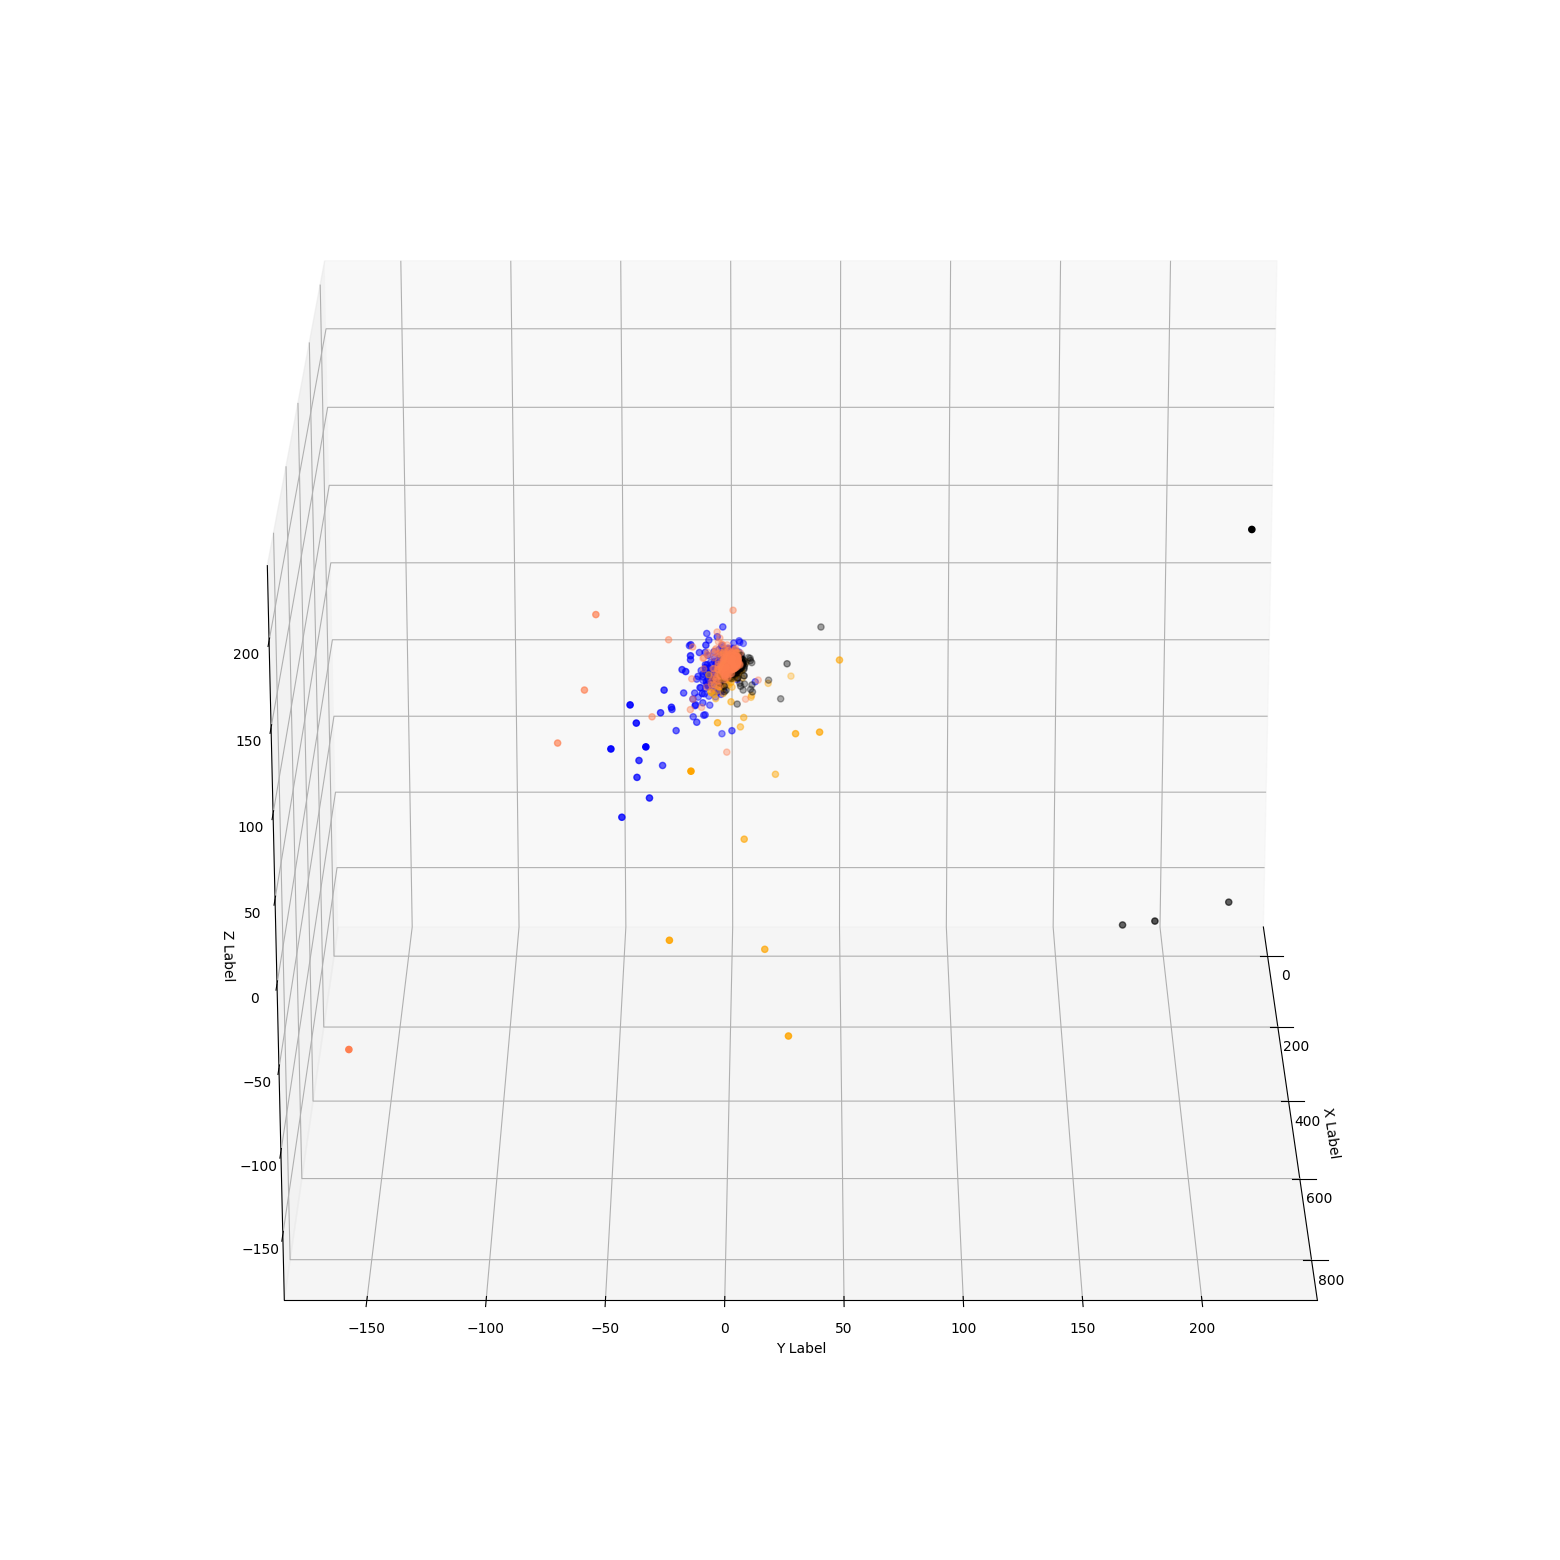

In [56]:
plot3D(X_reduced_1, 20, 0)

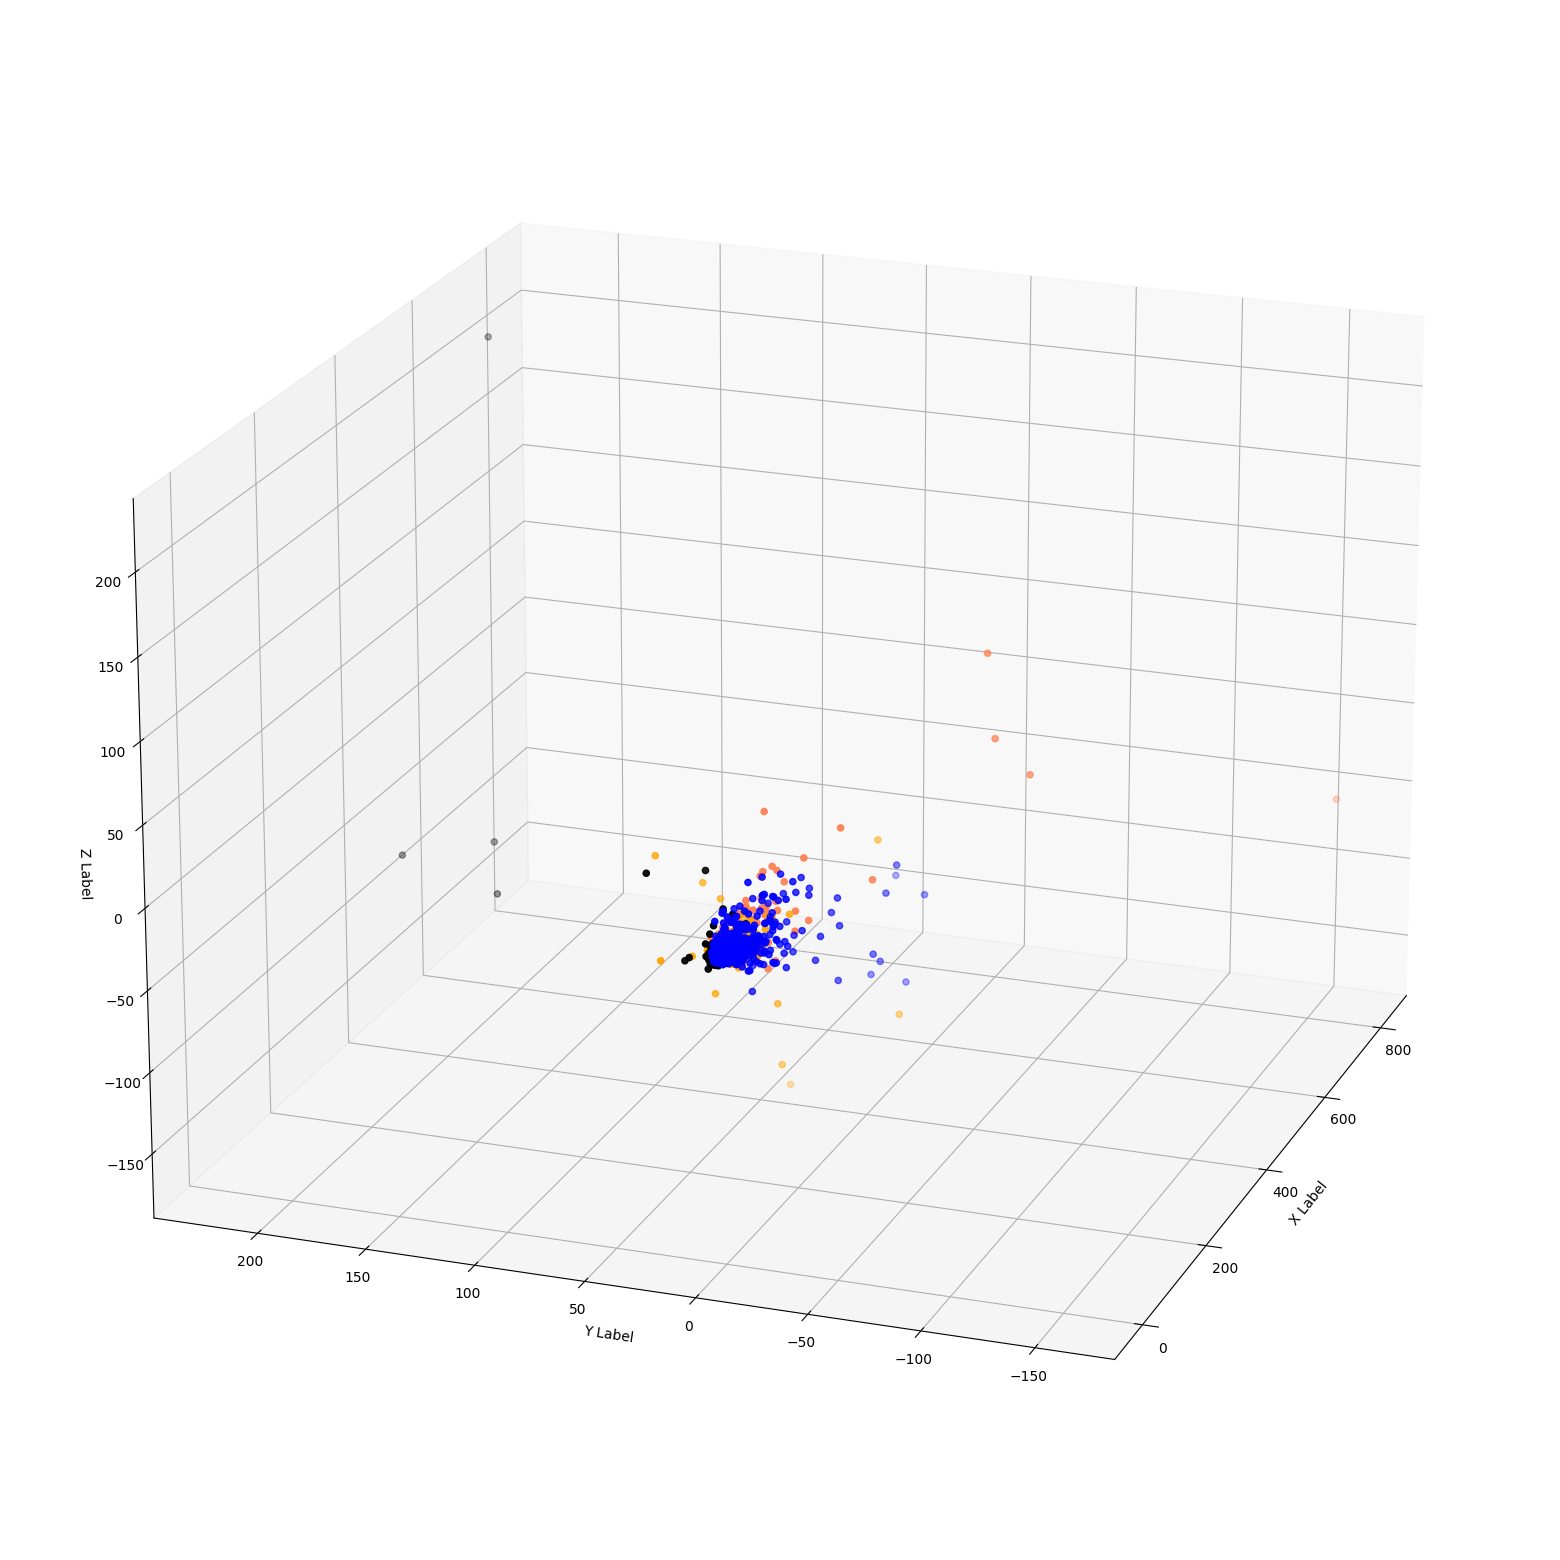

In [57]:
plot3D(X_reduced_1, 20, 200)

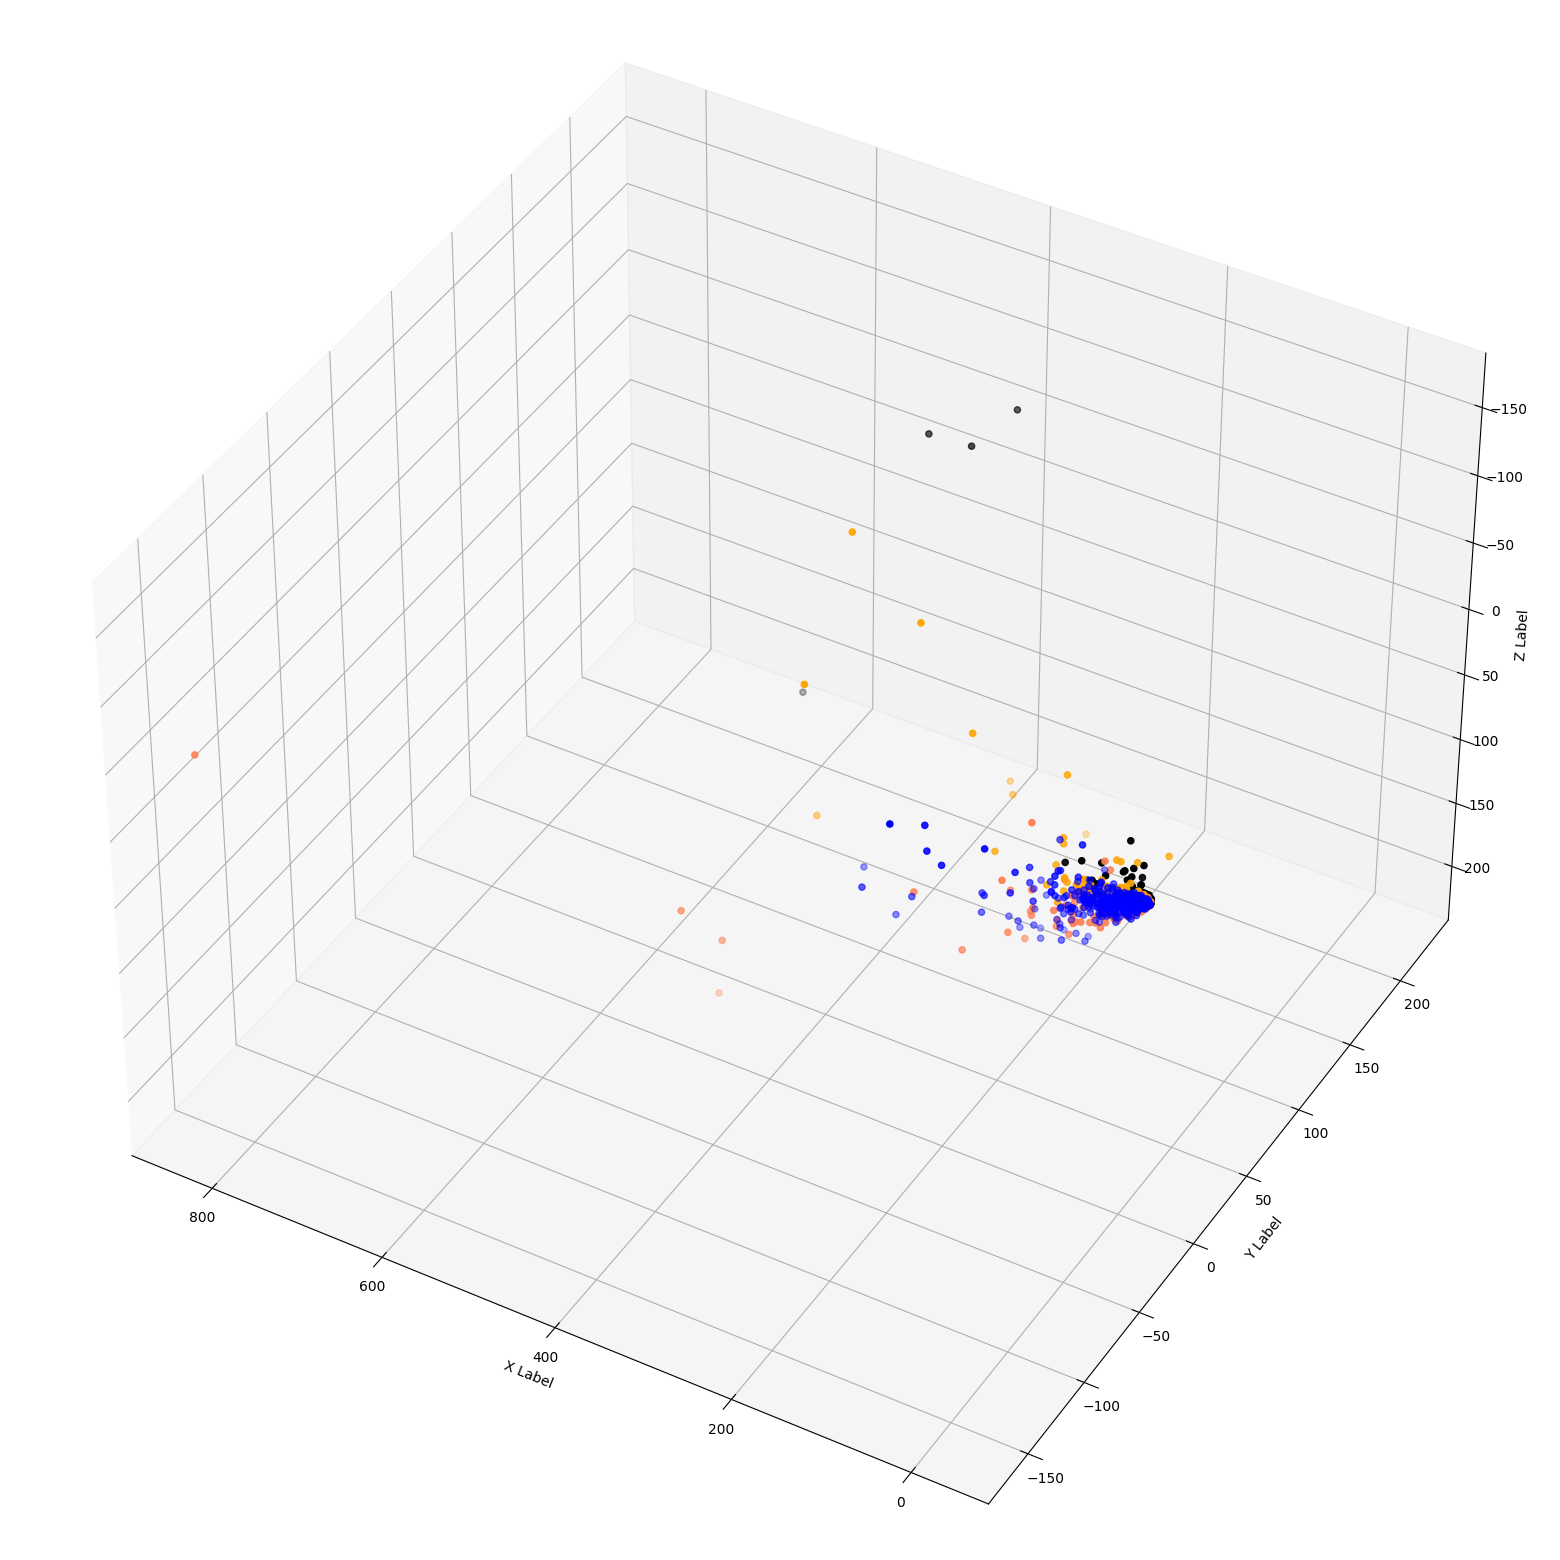

In [58]:
plot3D(X_reduced_1, -140, 60)

---

In [59]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# term_frequencies = [134  92   1 ...   1   1   1]

In [60]:
term_frequencies[0] #sum of first term

134

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

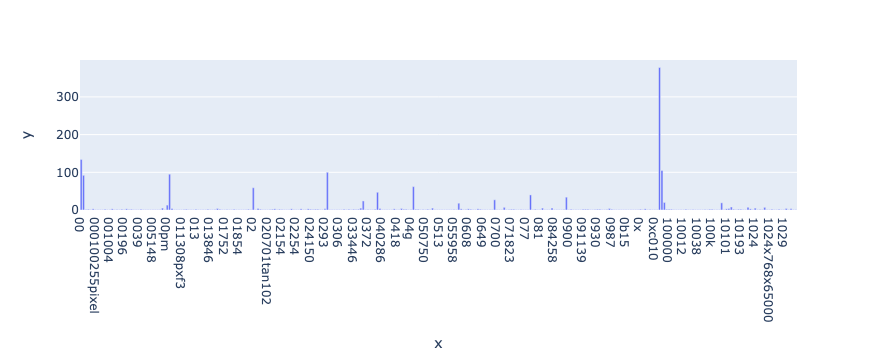

In [61]:
# Answer here
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.show()



---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


258


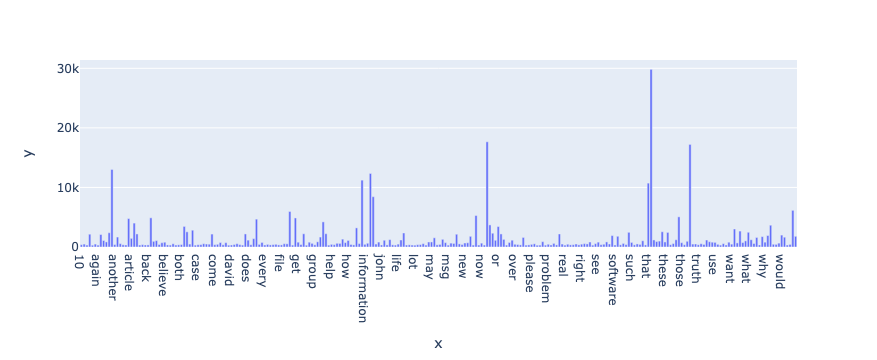

In [62]:
# Answer here
# filter based on term_frequencies

NUM = 300
# filter return tuple
larger_than_NUM = list(filter(lambda x: x[1]>NUM , zip(count_vect.get_feature_names_out()[:], 
            term_frequencies[:])))
print(len(larger_than_NUM))
name = [x[0] for x in larger_than_NUM]
fre = [x[1] for x in larger_than_NUM]

fig = px.bar(x= name, 
            y= fre)
fig.show()


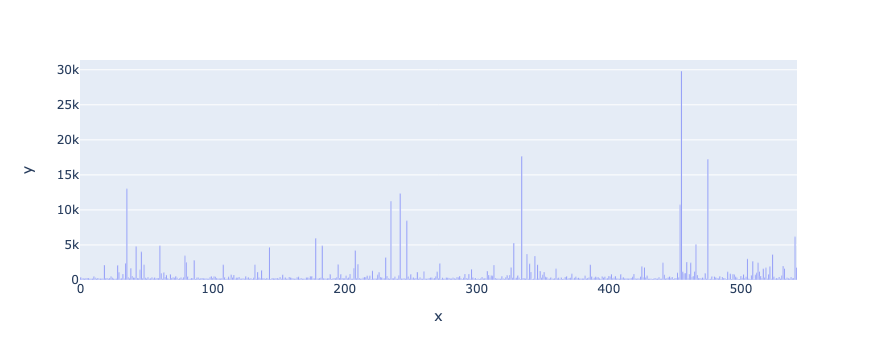

In [63]:
NUM = 150
over_NUM = term_frequencies[term_frequencies > NUM]

fig = px.bar(y= over_NUM)
fig.show()

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

#### if care about terms name

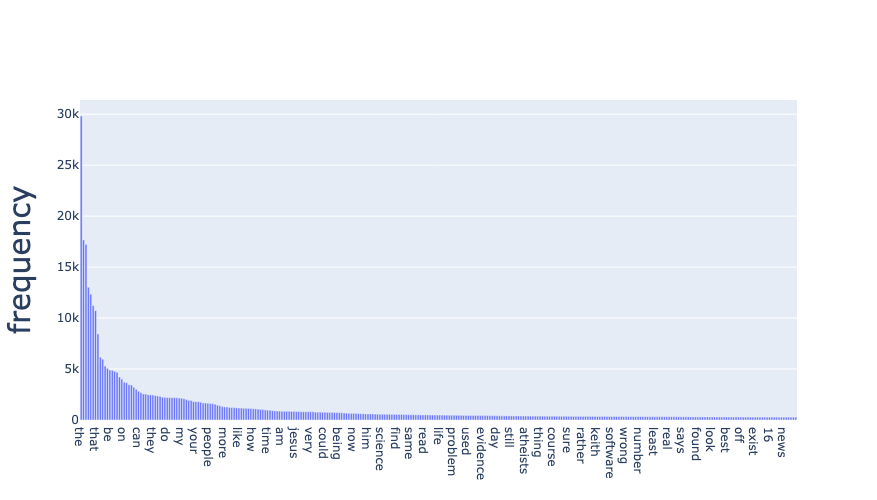

In [64]:
import plotly.graph_objects as go


fig = go.Figure()
sorted_count_vect = sorted(list(zip(count_vect.get_feature_names_out()[:], 
            term_frequencies[:])), key = lambda x: x[1], reverse= True)
name = [x[0] for x in sorted_count_vect]
fre = [x[1] for x in sorted_count_vect]


fig.add_trace(go.Bar(
    x=name[:300],
    y=fre[:300]
))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(
        title_text="frequency",
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        tickmode="array",
        titlefont=dict(size=30),
    )
)

fig.update_yaxes(automargin=True)

fig.show()

#### if don't care about terms name

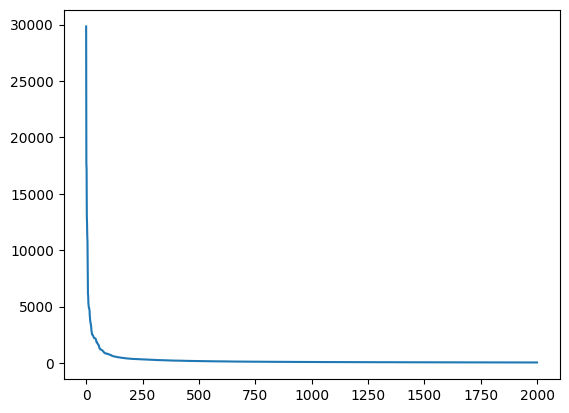

In [65]:
index = np.arange(2000)
plt.plot(index, fre[:2000])
plt.show()

---

In [66]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [67]:
mlb = preprocessing.LabelBinarizer()

In [68]:
# change category into binary form(bin_category, 0 -> 1.0.0.0, 1-> 0.1.0.0)
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [69]:
X[0:2]

text  category  category_name  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics   

                                            unigrams  bin_category  
0  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  [0, 1, 0, 0]  
1  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  [0, 1, 0, 0]

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [70]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer()

In [71]:
X['bin_category_by_catagory_name'] = mlb.transform(X['category_name']).tolist()
X[:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_by_catagory_name  
0  [0, 1, 0, 0]                  [0, 1, 0, 0]  
1  [0, 1, 0, 0]                  [0, 1, 0, 0]  
2  [0, 0, 0, 1]                  [0, 0, 0, 1]  
3  [0, 0, 0, 1]                  [0, 0, 0, 1]  
4  [0, 0, 0, 1]                  [0, 0, 0, 1]  
5  [0, 0, 0, 1]                  [0, 0, 0, 1]  
6  [0, 0, 0, 1]                  [0, 0, 0, 1]  
7  [0, 0, 1, 0]                  [0, 0, 1, 0]  
8  [0, 0, 1, 0]                  [0, 0, 1, 0]

### Answer here
#### yes. it works

---

# Part3. the new dataset

In [72]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
import plotly.express as px
import pandas as pd

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [73]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# categories
categories = [1, 0]

In [75]:
def generate_dataframe(file, resource):
    sentence = []
    label = []
    with open(file, 'r', encoding='utf8') as f:
        for line in f.readlines():
            split = line.split('\t')
            sentence.append(split[0])
            label.append(split[1].rstrip())
        df = pd.DataFrame({'sentence': sentence, 'label': label, 'resource': resource})
    return df

In [76]:
dir_data = 'sentiment labelled sentences'
f_imdb = os.path.join(dir_data, 'imdb_labelled.txt')
f_amazon = os.path.join(dir_data, 'amazon_cells_labelled.txt')
f_yelp = os.path.join(dir_data, 'yelp_labelled.txt')

amazon = generate_dataframe(f_amazon, 'amazon')
imdb = generate_dataframe(f_imdb, 'imdb')
yelp = generate_dataframe(f_yelp, 'yelp')

In [77]:
amazon

sentence label resource
0    So there is no way for me to plug it in here i...     0   amazon
1                          Good case, Excellent value.     1   amazon
2                               Great for the jawbone.     1   amazon
3    Tied to charger for conversations lasting more...     0   amazon
4                                    The mic is great.     1   amazon
..                                                 ...   ...      ...
995  The screen does get smudged easily because it ...     0   amazon
996  What a piece of junk.. I lose more calls on th...     0   amazon
997                       Item Does Not Match Picture.     0   amazon
998  The only thing that disappoint me is the infra...     0   amazon
999  You can not answer calls with the unit, never ...     0   amazon

[1000 rows x 3 columns]

In [78]:
imdb

sentence label resource
0    A very, very, very slow-moving, aimless movie ...     0     imdb
1    Not sure who was more lost - the flat characte...     0     imdb
2    Attempting artiness with black & white and cle...     0     imdb
3         Very little music or anything to speak of.       0     imdb
4    The best scene in the movie was when Gerardo i...     1     imdb
..                                                 ...   ...      ...
995  I just got bored watching Jessice Lange take h...     0     imdb
996  Unfortunately, any virtue in this film's produ...     0     imdb
997                   In a word, it is embarrassing.       0     imdb
998                               Exceptionally bad!       0     imdb
999  All in all its an insult to one's intelligence...     0     imdb

[1000 rows x 3 columns]

In [79]:
yelp

sentence label resource
0                             Wow... Loved this place.     1     yelp
1                                   Crust is not good.     0     yelp
2            Not tasty and the texture was just nasty.     0     yelp
3    Stopped by during the late May bank holiday of...     1     yelp
4    The selection on the menu was great and so wer...     1     yelp
..                                                 ...   ...      ...
995  I think food should have flavor and texture an...     0     yelp
996                           Appetite instantly gone.     0     yelp
997  Overall I was not impressed and would not go b...     0     yelp
998  The whole experience was underwhelming, and I ...     0     yelp
999  Then, as if I hadn't wasted enough of my life ...     0     yelp

[1000 rows x 3 columns]

In [80]:
total = pd.concat([amazon, imdb, yelp], ignore_index=True)
total = total.sample(frac=1).reset_index(drop=True)
print(len(total))

3000


In [81]:
total['unigrams'] = total['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [82]:
total[:10][["sentence","resource"]]

sentence resource
0              This is high adventure at its best.       imdb
1  I am so thrilled after seeing a movie like thi...     imdb
2  Worse, there's an incredibly weak sub-plot thr...     imdb
3              But now I was completely grossed out.     yelp
4  Food was good, service was good, Prices were g...     yelp
5     There are some generally great things in it.       imdb
6             Julian Fellowes has triumphed again.       imdb
7  Juano Hernandez (an exceptional actor who play...     imdb
8                              The portion was huge!     yelp
9                             It was way over fried.     yelp

In [83]:
total[total["resource"]=='imdb'].iloc[::10][:5]

sentence label resource  \
0                This is high adventure at its best.       1     imdb   
18   Call me a nut, but I think this is one of the ...     1     imdb   
64   Definitely worth seeing
 it's the sort of thou...     1     imdb   
81   And there wasn't a single sour note struck act...     1     imdb   
122  This movie is a pure disaster, the story is st...     0     imdb   

                                              unigrams  
0        [This, is, high, adventure, at, its, best, .]  
18   [Call, me, a, nut, ,, but, I, think, this, is,...  
64   [Definitely, worth, seeing, it, 's, the, sort,...  
81   [And, there, was, n't, a, single, sour, note, ...  
122  [This, movie, is, a, pure, disaster, ,, the, s...

### check for missing value

In [84]:
import helpers.data_mining_helpers as dmh 
total.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             resource                            unigrams  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [85]:
# remove punctuation
translator = str.maketrans('', '', string.punctuation)# dict
# new_string = a_string.translate(str.maketrans('', '', string.punctuation))

total['sentence'] = total['sentence'].apply(lambda s : s.translate(translator))
# turn into lower case
total['sentence'] = total['sentence'].apply(lambda s : s.lower())

## duplicate

In [86]:
sum(total.duplicated('sentence'))

29

In [87]:
total.drop_duplicates(subset='sentence', inplace=True) 

In [88]:
len(total)

2971

## document-term  matrix

In [89]:
# generate document-term matrix
# Convert a collection of text documents to a matrix of token counts.
count_vect_p2 = CountVectorizer()
data_counts = count_vect_p2.fit_transform(total.sentence)
data_counts.shape

(2971, 5376)

####  detail of data_counts which is generated by CountVectorizer()
- document(sentence) no. = 2971
- term no. = 5376
    - [[0 1 0 ... 0 0 0 0 4]
     [0 2 0 ... 0 1 1 0 1]
            ...
     [1 0 0 ... 1 0 1 1 1]
     [0 1 1 ... 0 0 1 0 1]]

In [90]:
def plot_term_matrix(matrix, precision):
    plt.subplots(figsize=(20, 30))
    plt.spy(matrix, precision=precision, markersize=1)
    plt.xlabel('words')
    plt.ylabel('documents(sentence)')

#### word frequency > 0 would be plotted

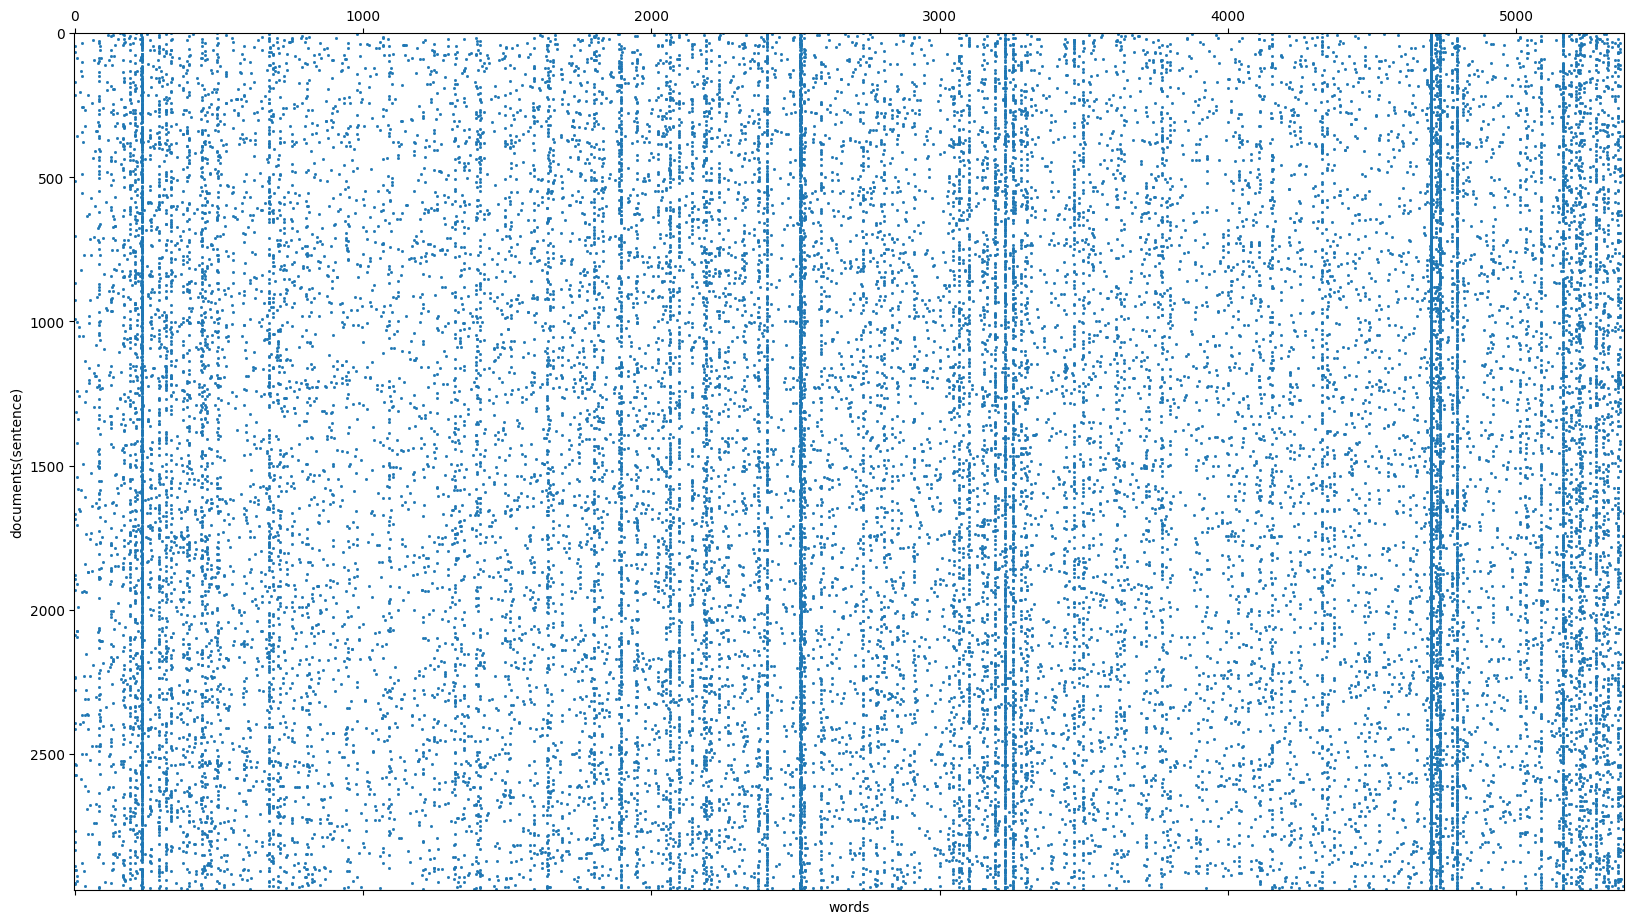

In [91]:
plot_term_matrix(data_counts, 0)

#### word frequency > 1 would be plotted

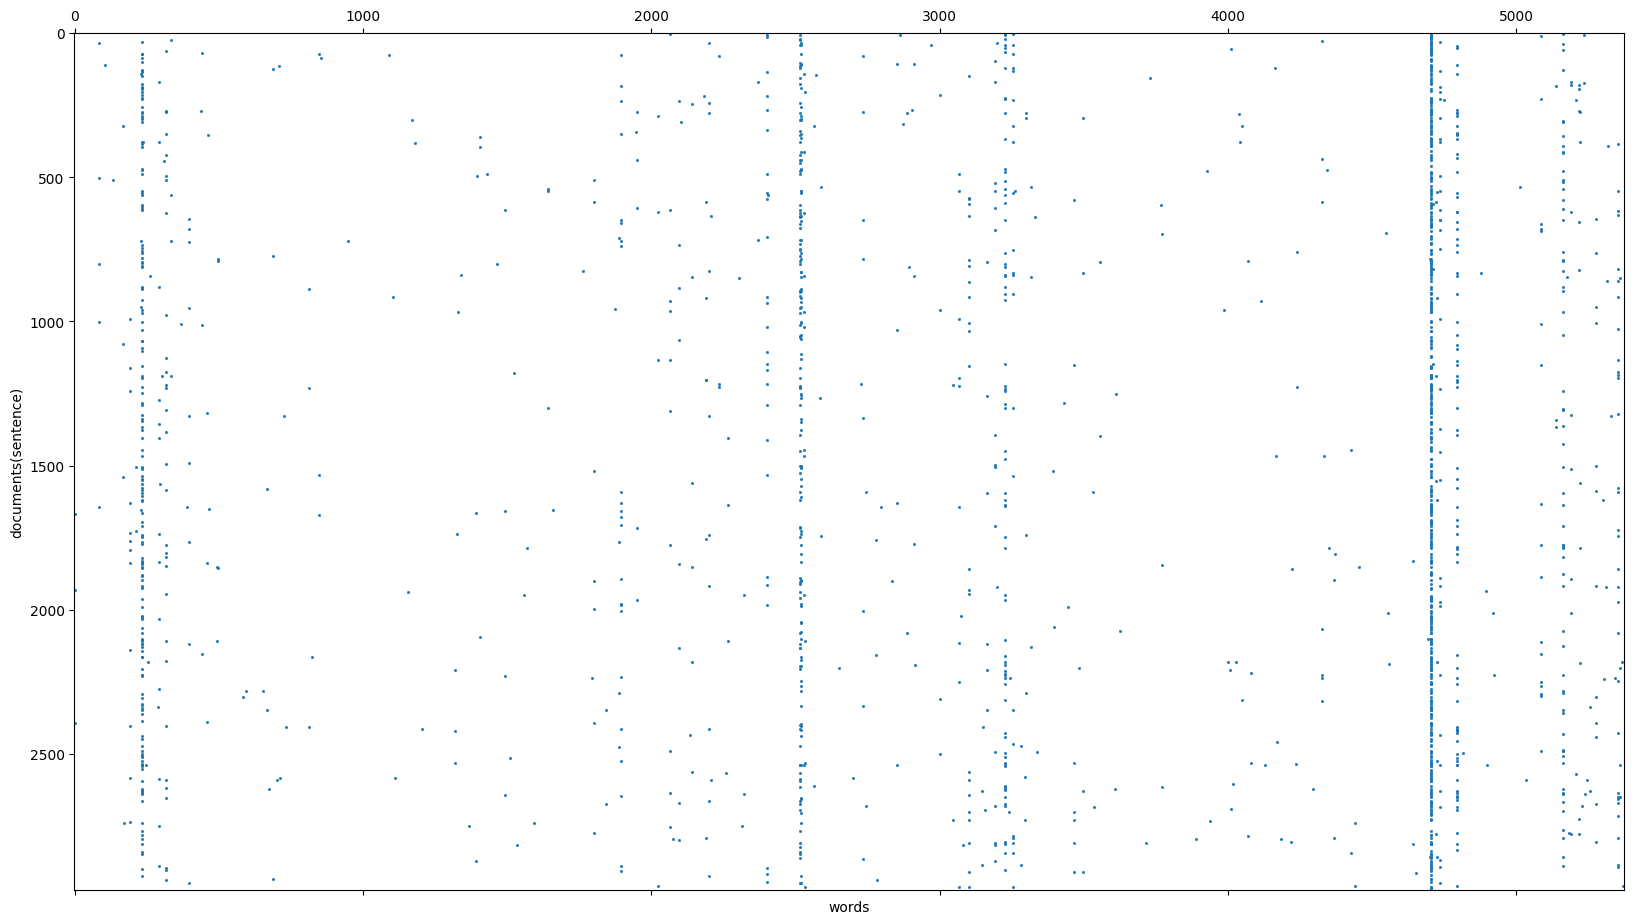

In [92]:
plot_term_matrix(data_counts, 1)

In [93]:
(total['label'] == '1').values

array([ True,  True, False, ...,  True, False, False])

In [94]:
print(data_counts[(total['label'] == '1').values][:2])

  (0, 4737)	1
  (0, 2516)	1
  (0, 2249)	1
  (0, 159)	1
  (0, 336)	1
  (0, 2530)	1
  (0, 495)	1
  (1, 4737)	1
  (1, 212)	1
  (1, 4327)	1
  (1, 4755)	1
  (1, 169)	1
  (1, 4109)	1
  (1, 3068)	1
  (1, 2734)	1


#### sum up each word's frequency in label1 and label0 separately.

In [95]:
frequencies_1 = data_counts[(total['label'] == '1').values].toarray().sum(axis=0)
frequencies_0 = data_counts[(total['label'] == '0').values].toarray().sum(axis=0)

In [96]:
# count a number of a word that appears in label=1 sentence 
frequencies_1
# len(frequencies_0) = 5376

array([ 0, 15,  2, ...,  0,  0,  0])

#### return frequency top 20 word's index in 'count_vect_p2.get_feature_names_out()'

In [97]:
np.argsort(frequencies_1)[::-1][:20]

array([4706,  234, 2516, 4737, 2521, 3228, 4794, 5164, 2401, 2096, 2066,
       1897, 5278, 5086, 4703, 3103, 3254,  294, 1803, 5353])

In [98]:
print('top 3 words are: ')
print(count_vect_p2.get_feature_names_out()[4706])
print(count_vect_p2.get_feature_names_out()[234])
print(count_vect_p2.get_feature_names_out()[2516])

top 3 words are: 
the
and
is


In [99]:
def fre_plot(terms_fre_sum, label):
    N = 20
    index = np.arange(N)
    
    top_N_term = []
    # argsort return index
    # use index to rank terms ([::-1] due to argsort rank from small to large)
    
    for i in np.argsort(terms_fre_sum)[::-1][:N]:
        top_N_term.append(count_vect_p2.get_feature_names_out()[i])
    y = np.sort(terms_fre_sum)[::-1][:N]

    fig = plt.figure(figsize=(10, 5))
    ax = fig.subplots()

    ax.set_title('Top {N} term in {label} comment' .format(N=N, label=label))
    color = 'orange' if label == 'positive' else 'blue'
    ax.barh(index, y, align='center', color='tab:{color}' .format(color = color))
    ax.set_yticks(index)
    ax.set_yticklabels(top_N_term)
    ax.invert_yaxis()

    fig.tight_layout()
    plt.show()

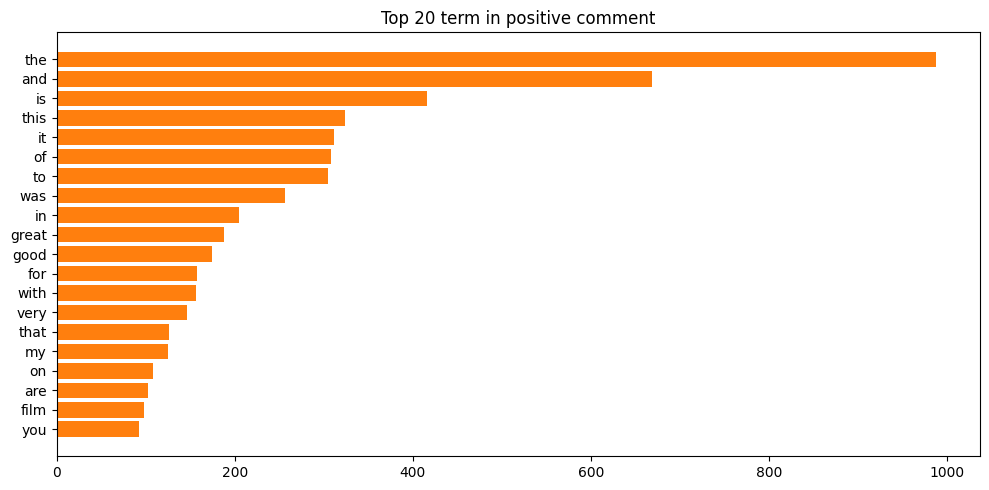

In [100]:
fre_plot(frequencies_1, 'positive')

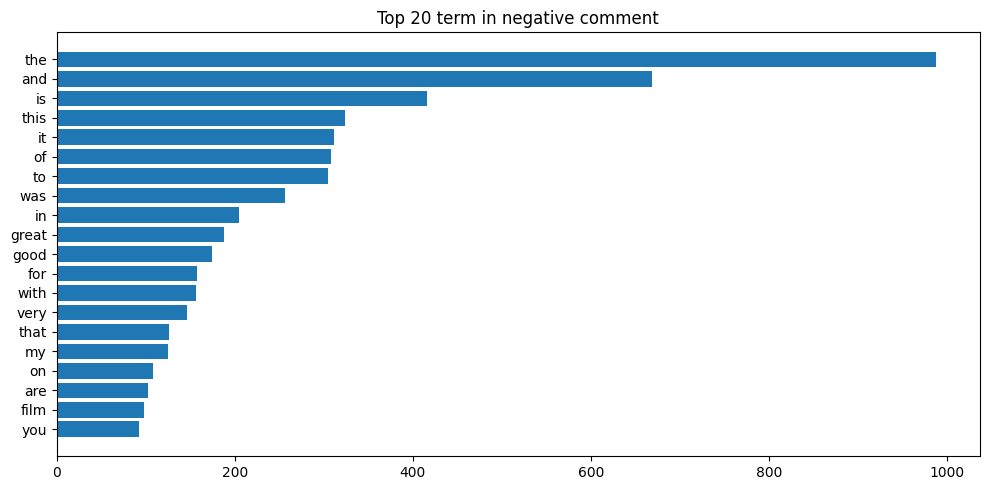

In [101]:
fre_plot(frequencies_1, 'negative')

## TFIDF

In [104]:

# generate tfidf features
tfidf_vect_p2 = TfidfVectorizer()
data_tfidf = tfidf_vect_p2.fit_transform(total.sentence)
data_tfidf.shape

(2971, 5376)

#### data_tfidf example:
 - (0, 3899)	0.23655810618388157 
 - (0, 4625)	0.2658974753690424
 - (0, 3279)	0.2658974753690424
 - (0, 48)	0.2658974753690424
 - (0, 133)	0.2658974753690424

### naive_bayes classifier : MultinomialNB

In [105]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Bernoulli, multinomial and Gaussian.
The only difference is about the probability distribution adopted. 
1. Bernoulli: is a binary algorithm particularly useful when a feature can be present or not. 
2. Multinomial naive Bayes assumes to have feature vector where each element represents the number of times it appears (or, very often, its frequency). 
This technique is very efficient in natural language processing or whenever the samples are composed starting from a common dictionary. 
3. The Gaussian Naive Bayes, instead, is based on a continuous distribution and it’s suitable for more generic classification tasks.

#### Multinomial
alpha parameter (called Laplace smoothing factor) : 
which default value is 1.0 and prevents the model from setting null probabilities when the frequency is zero

#### manually split train set, test set, and compute accuracy

In [106]:
import itertools
x = data_counts 
y = total['label']
#print(y) # 3000
mnb =  MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  
mnb.fit(X_train, y_train)

count = 0

for (a, b) in zip(mnb.predict(X_test),y_test):
    if a == b:
        count+=1
print(f'\naccuracy = {count}/{len(y_test)} = {count/len(y_test)}')
# cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()


accuracy = 241/298 = 0.8087248322147651


#### use cross_val_score for the accuracy

In [107]:
def accuracy(x, y):        
    mnb = MultinomialNB()
    MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
    # cv= 10 --> 10 groups
    # cross_val_score gets [ 0.96666667 1. 1. ... 0.93333333 1. ] 10 accuracy
    return cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()
# cross_val_score include training??

#### base on term frequency's accuracy

In [108]:
# Use term frequency features to build classifiers.
x = data_counts
y = total['label'] # str

accuracy(x, y)

0.8273337400854179

#### base on tfidf's accuracy

In [109]:
# Use tfidf features to build classifiers.

x = data_tfidf
y = total['label']
    
accuracy(x, y)

0.8263258988091204

---

##  Part 4: Data preprocessing improvement

In [110]:
import time

#### use sns.heatmap slowest

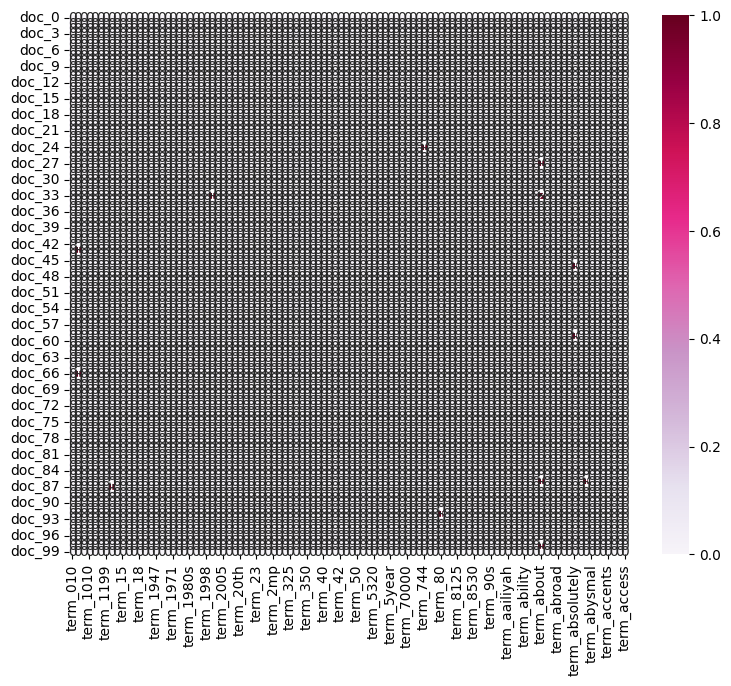

time : 4.127531051635742 sec


In [111]:
# use news group data set to compare the execution time to plot term matrix
# original method
# showing first fifty features only
N = 100
plot_x = ["term_"+str(i) for i in count_vect_p2.get_feature_names_out()[0:N]]
plot_y = ["doc_"+ str(i) for i in list(total.index)[0:N]]
plot_z = data_counts[:N, :N].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

start = time.time()

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()

print(f'time : {time.time() - start} sec')

#### speed: middle

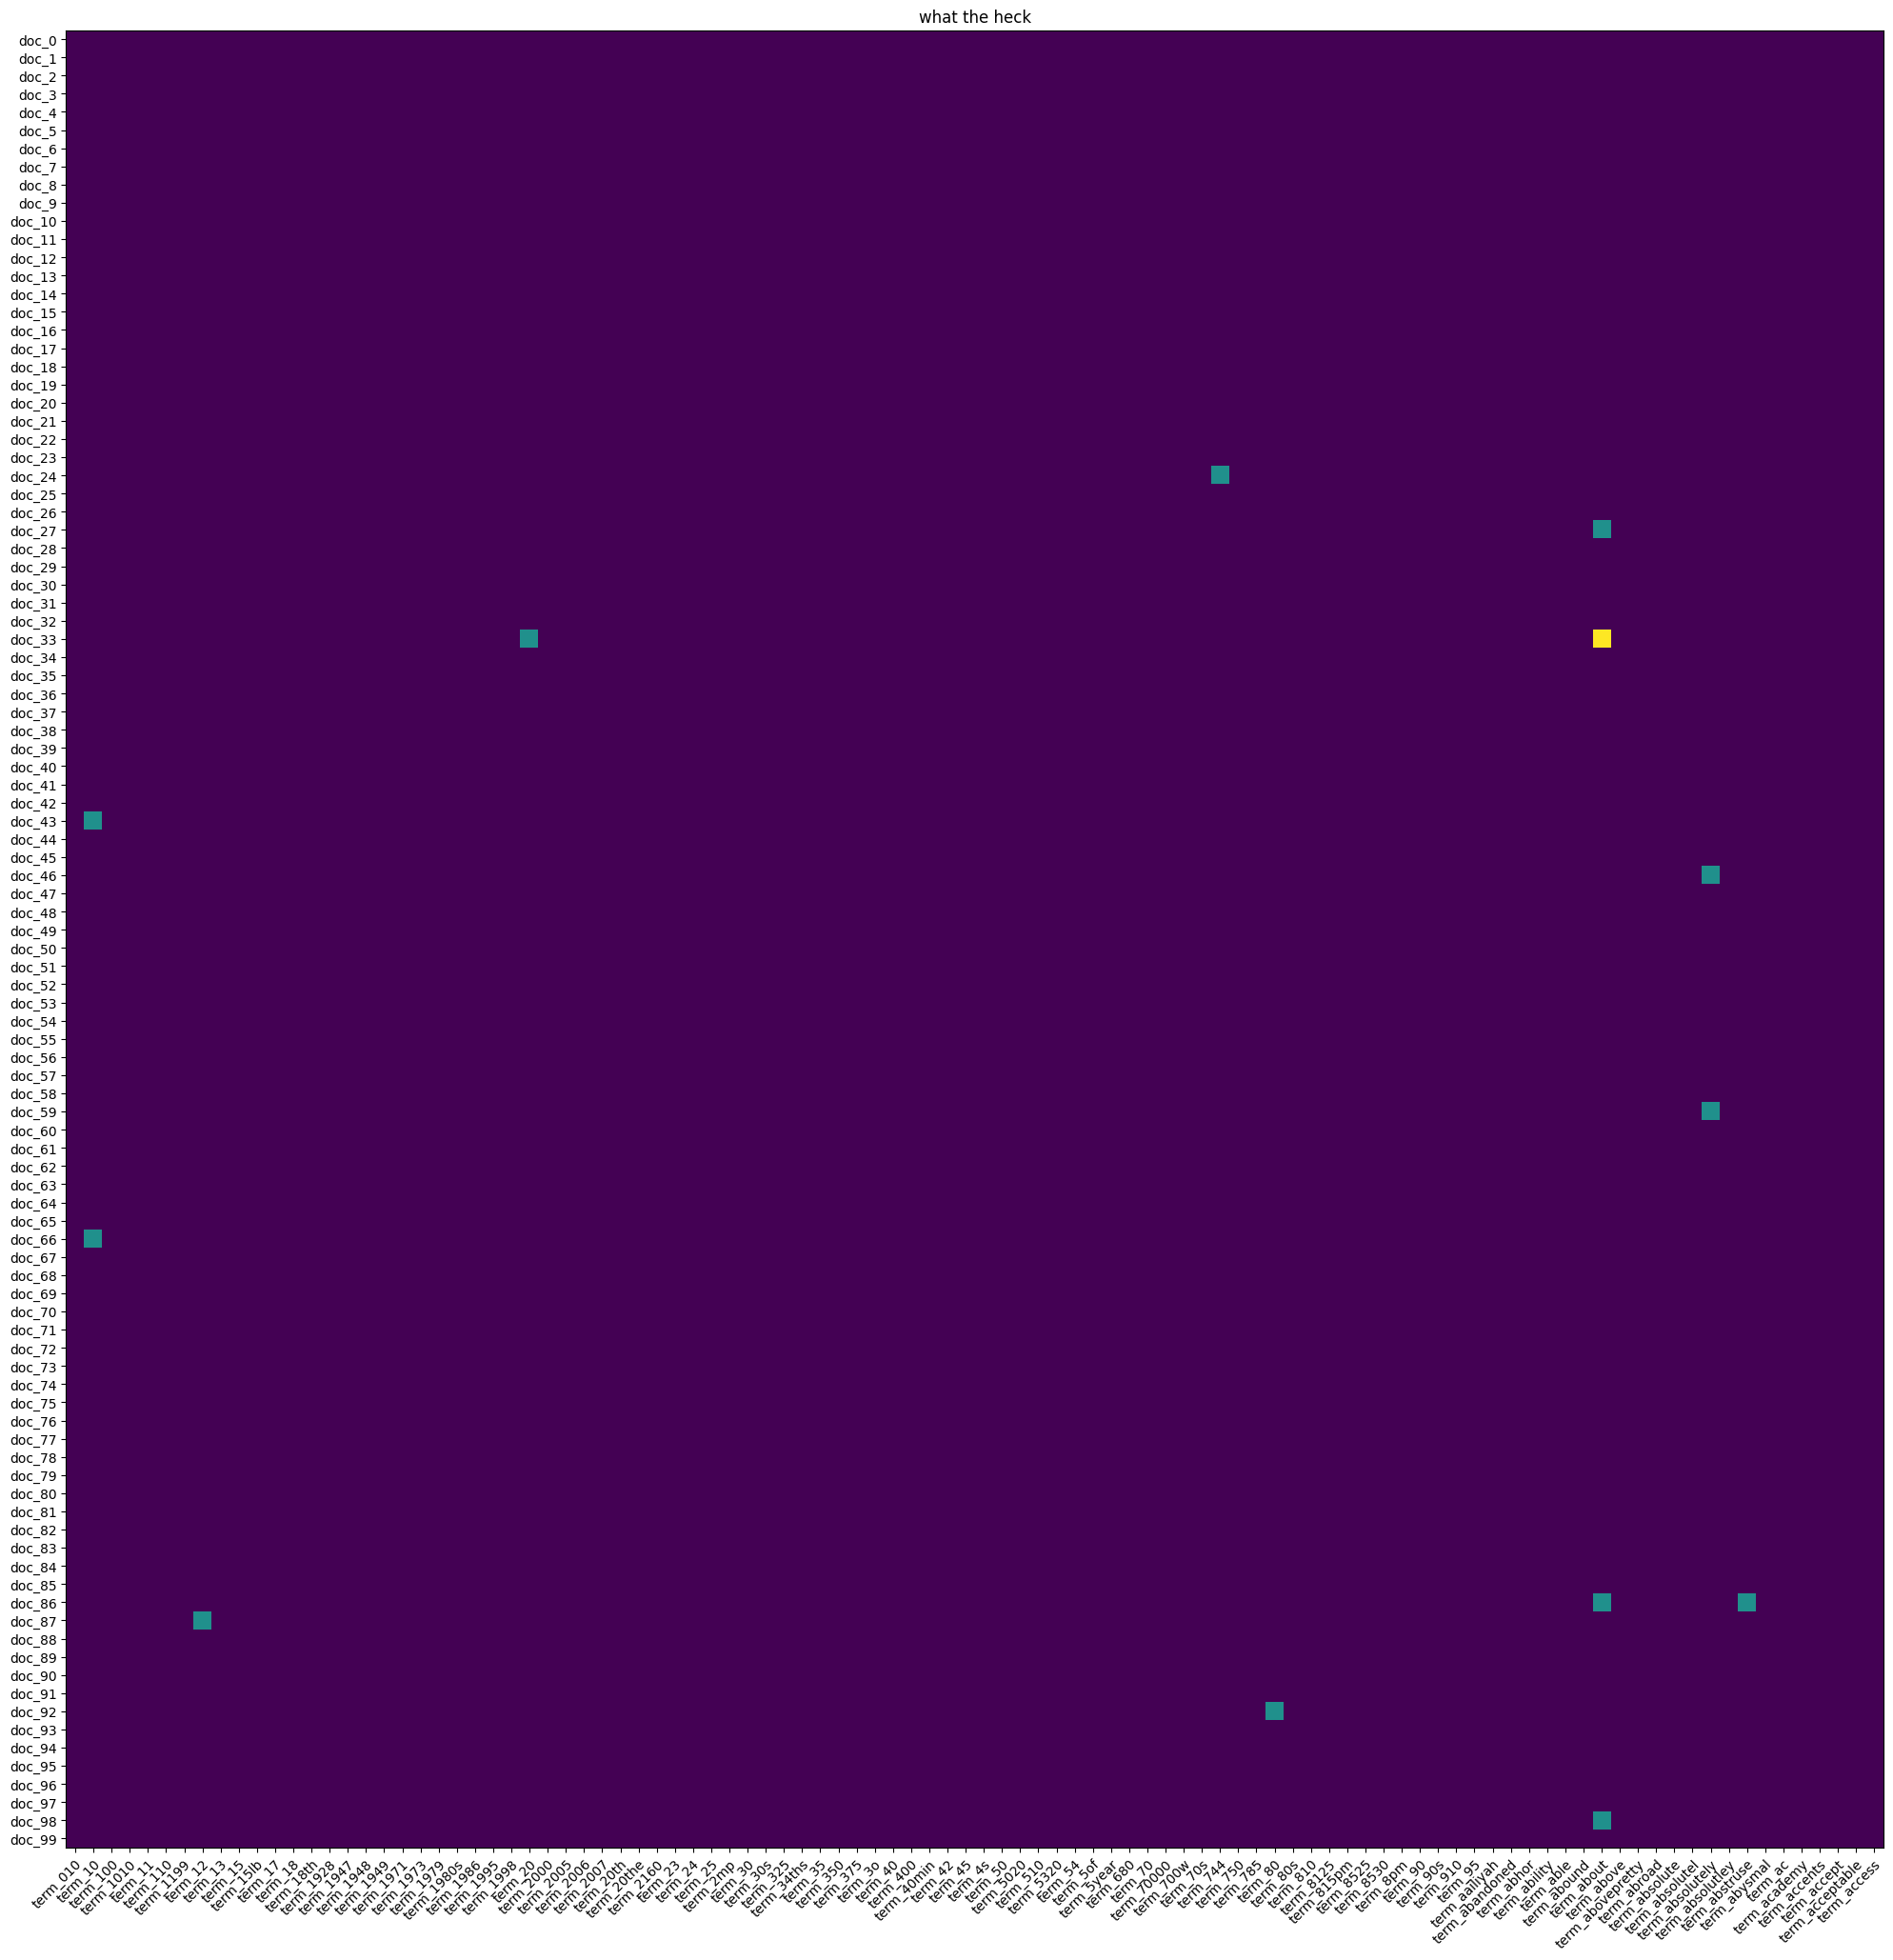

time : 0.7225179672241211 sec


In [112]:
N = 100
plot_x = ["term_"+str(i) for i in count_vect_p2.get_feature_names_out()[0:N]]
plot_y = ["doc_"+ str(i) for i in list(total.index)[0:N]]
plot_z = data_counts[:N, :N].toarray()

#df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

start = time.time()

fig, ax = plt.subplots(figsize=(20, 25))
im = ax.imshow(plot_z)

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(plot_y)), labels=plot_y)
ax.set_xticks(np.arange(len(plot_x)), labels=plot_x)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("what the heck")
fig.tight_layout()
plt.show()
print(f'time : {time.time() - start} sec')


#### plt.spy: fastst

8


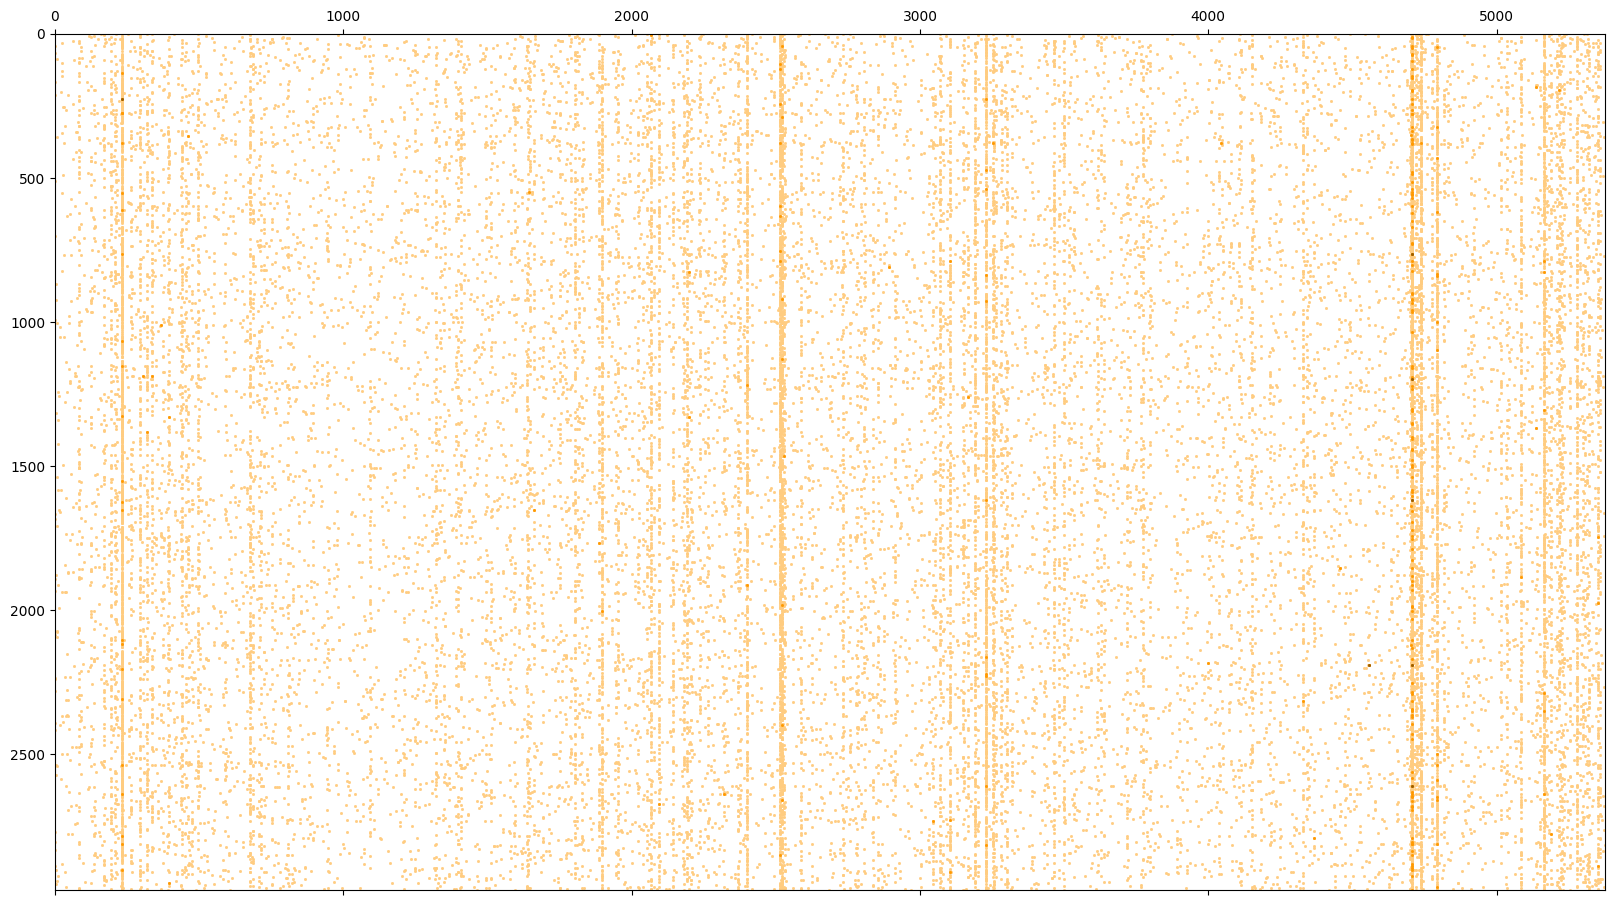

time : 0.1932981014251709 sec


In [113]:
# print all data
print(data_counts.max())

start = time.time()

precisions = [0, 2, 5, 10]
# color palette reference: cmap='PuRd'
colors = ['#ffcc80', '#ff9900', '#995c00', '#331f00']

plt.subplots(figsize=(20, 25))
# plot first 15000 terms
for p, c in zip(precisions, colors):
    plt.spy(data_counts[:, :], precision=p, markersize=1, color=c)

plt.show()

print(f'time : {time.time() - start} sec')


#### slower in for loop

In [114]:
# use new data set to compare the execution time to compute term frequencies
# original method
start = time.time()

term_frequencies_first_100_doc = []
for j in range(0, data_counts[:100].shape[1]):
    term_frequencies_first_100_doc.append(sum(data_counts[:,j].toarray()))
    
print(f'time : {time.time() - start} sec')

time : 4.813462018966675 sec


#### faster in toarray().sum()

In [115]:
# new method
start = time.time()

term_frequencies_first_100_doc = data_counts[:100].toarray().sum(axis=0)

print(f'time : {time.time() - start} sec')

time : 0.0017821788787841797 sec
